In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split


In [2]:
# Import data
df = pd.read_csv("data.csv")

In [3]:
# Check data
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,bmi,map,bsa,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,0,50.3573,2,168,62.0,110,80,1,1,0,...,1,0,21.9671,90.0000,1.70098,middle-aged,prehypertension,2,normal weight,healthy
1,1,55.3812,1,156,85.0,140,90,3,1,0,...,1,1,34.9277,106.6670,1.91920,middle-aged,hypertension,4,obese,healthy
2,2,51.6277,1,165,64.0,130,70,3,1,0,...,0,1,23.5078,90.0000,1.71270,middle-aged,prehypertension,4,normal weight,moderate
3,3,48.2491,2,169,82.0,150,100,1,1,0,...,1,1,28.7105,116.6670,1.96200,middle-aged,hypertension,2,overweight,healthy
4,4,47.8412,1,156,56.0,100,60,1,1,0,...,0,0,23.0112,73.3333,1.55778,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.6763,2,168,76.0,120,80,1,1,1,...,1,0,26.9274,93.3333,1.88326,middle-aged,prehypertension,2,overweight,moderate
69996,99995,61.8782,1,158,126.0,140,90,2,2,0,...,1,1,50.4727,106.6670,2.35160,elderly,hypertension,4,obese,healthy
69997,99996,52.1999,2,183,105.0,180,90,3,1,0,...,0,1,31.3536,120.0000,2.31030,middle-aged,hypertension,4,obese,moderate
69998,99998,61.4127,1,163,72.0,135,80,1,2,0,...,0,1,27.0993,98.3333,1.80555,elderly,prehypertension,3,overweight,moderate


### Removing Outliers

In [4]:
# Checking outliers

# Create subplots function
def create_boxplots(df: pd.DataFrame):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle('Boxplots of Age, Height, Weight, BMI, AP_HI, AP_LO, BSA')

    # Boxplot for Age
    sns.boxplot(x=df['age'], ax=axes[0, 0])
    axes[0, 0].set_title('Age')

    # Boxplot for Height
    sns.boxplot(x=df['height'], ax=axes[0, 1])
    axes[0, 1].set_title('Height')

    # Boxplot for Weight
    sns.boxplot(x=df['weight'], ax=axes[0, 2])
    axes[0, 2].set_title('Weight')

    # Boxplot for BMI
    sns.boxplot(x=df['bmi'], ax=axes[1, 0])
    axes[1, 0].set_title('BMI')

    # Boxplot for AP_HI
    sns.boxplot(x=df['ap_hi'], ax=axes[1, 1])
    axes[1, 1].set_title('AP_HI')

    # Boxplot for AP_LO
    sns.boxplot(x=df['ap_lo'], ax=axes[1, 2])
    axes[1, 2].set_title('AP_LO')
    
    # Boxplot for BSA
    sns.boxplot(x=df['bsa'], ax=axes[2, 0])
    axes[2, 0].set_title('bsa')

    plt.tight_layout()
    plt.show()


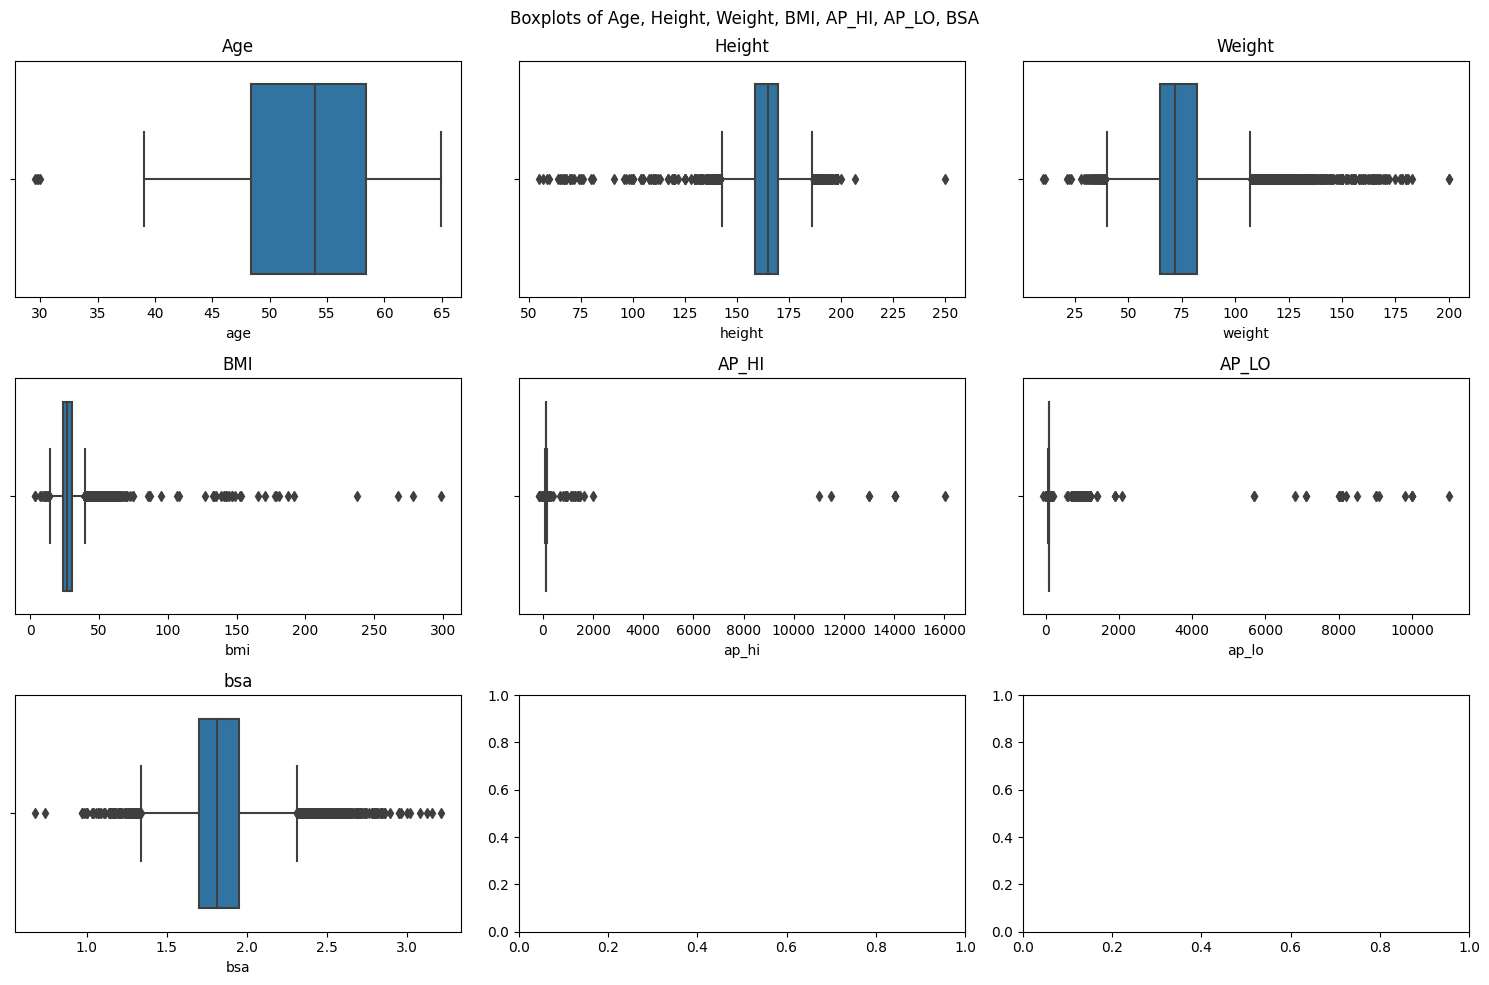

In [5]:
# See the outliers
create_boxplots(df=df)


In [6]:
# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=2):
        z_scores = stats.zscore(df[columns])
        df_no_outliers = df[(z_scores < threshold).all(axis=1)]
        return df_no_outliers



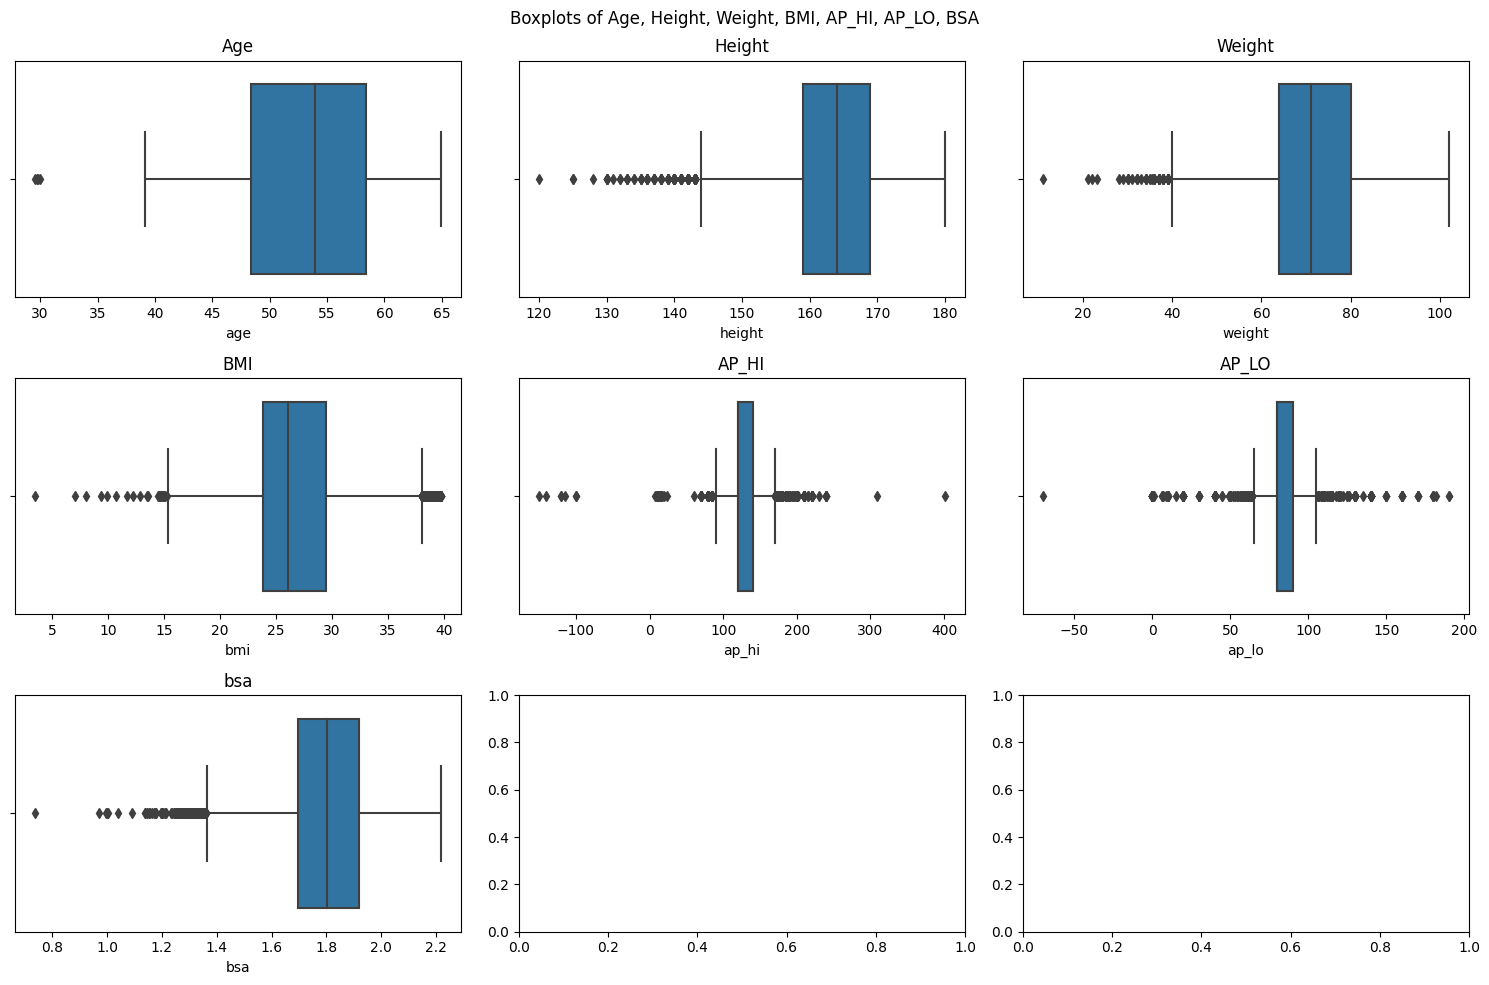

In [7]:
# Select columns
columns_to_remove_outliers = ['age', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'map', 'bsa']

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers_zscore(df, columns_to_remove_outliers)

# Call the function
create_boxplots(df=df_no_outliers)


In [8]:
df = df_no_outliers

In [9]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
for col in numerical_columns:
    print(f"{col} Min ==>", df[col].min())
    print(f"{col} Max ==>", df[col].max())

id Min ==> 0
id Max ==> 99999
age Min ==> 29.5633
age Max ==> 64.9227
gender Min ==> 1
gender Max ==> 2
height Min ==> 120
height Max ==> 180
weight Min ==> 11.0
weight Max ==> 102.0
ap_hi Min ==> -150
ap_hi Max ==> 401
ap_lo Min ==> -70
ap_lo Max ==> 190
cholesterol Min ==> 1
cholesterol Max ==> 3
gluc Min ==> 1
gluc Max ==> 3
smoke Min ==> 0
smoke Max ==> 1
alco Min ==> 0
alco Max ==> 1
active Min ==> 0
active Max ==> 1
cardio Min ==> 0
cardio Max ==> 1
bmi Min ==> 3.47178
bmi Max ==> 39.7283
map Min ==> -41.6667
map Max ==> 187.0
bsa Min ==> 0.737488
bsa Max ==> 2.21736
total_cholesterol Min ==> 2
total_cholesterol Max ==> 6


In [10]:
# Discard unlogical values
df = df[(df["ap_hi"] > 60) & (df["ap_hi"] < 300)]
df = df[(df["ap_lo"] > 40) & (df["ap_lo"] < 200)]


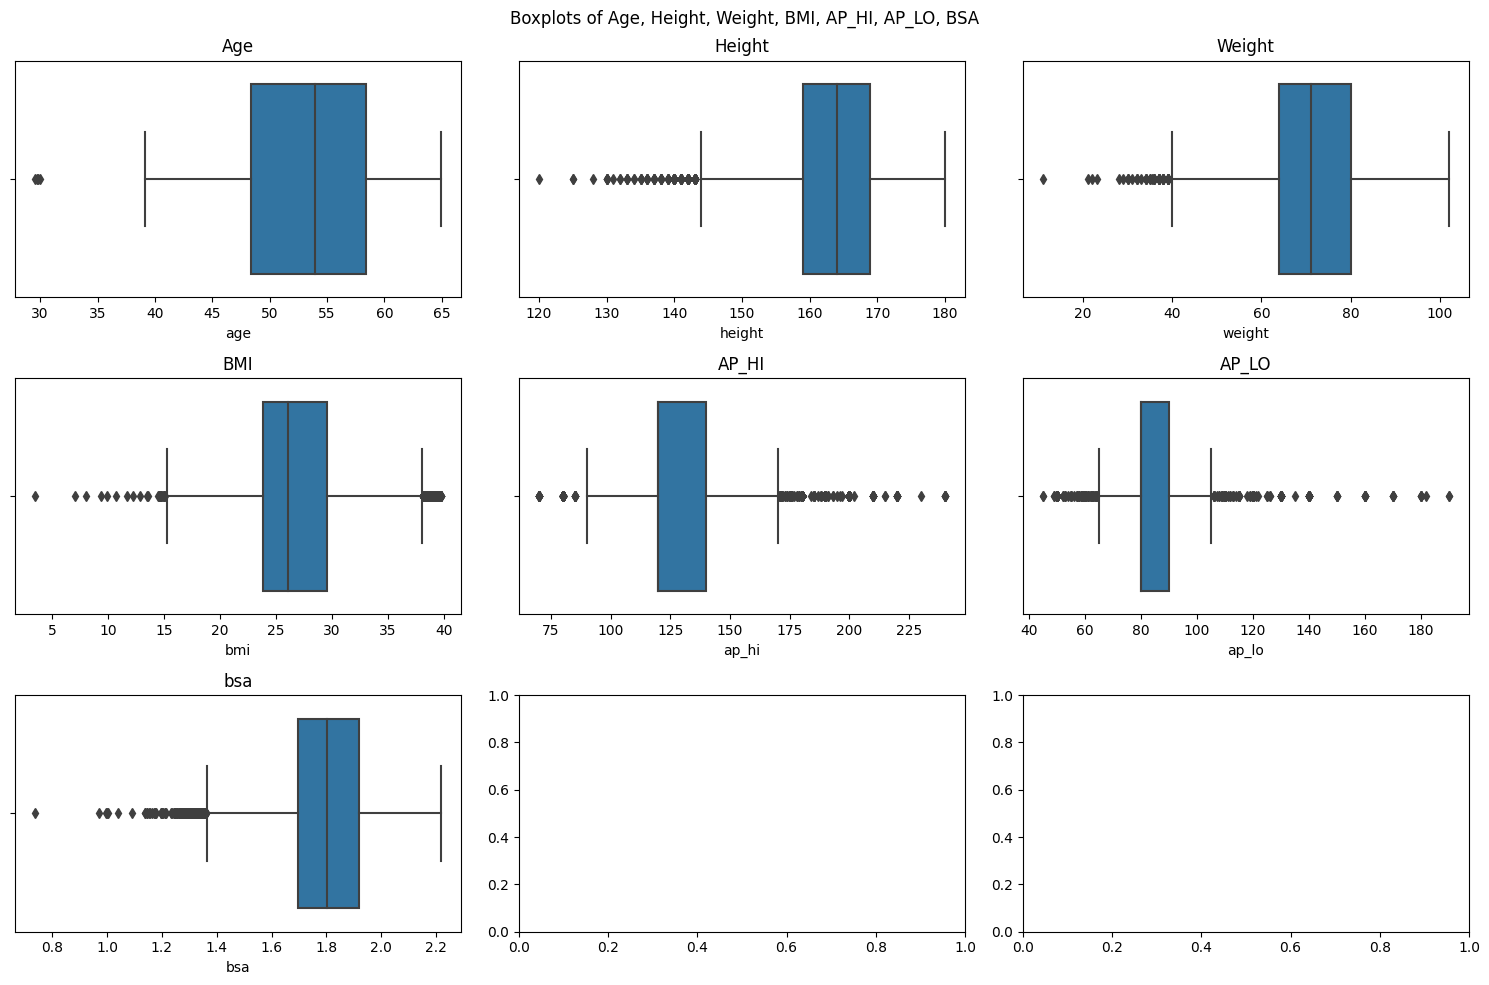

In [11]:
# Check plots again
create_boxplots(df=df)

In [12]:
df.shape
# No big losses 

(64195, 21)

### Deleting unnecessary columns

In [13]:
df.drop(columns=["id"], inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map,bsa,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50.3573,2,168,62.0,110,80,1,1,0,0,1,0,21.9671,90.0000,1.70098,middle-aged,prehypertension,2,normal weight,healthy
1,55.3812,1,156,85.0,140,90,3,1,0,0,1,1,34.9277,106.6670,1.91920,middle-aged,hypertension,4,obese,healthy
2,51.6277,1,165,64.0,130,70,3,1,0,0,0,1,23.5078,90.0000,1.71270,middle-aged,prehypertension,4,normal weight,moderate
3,48.2491,2,169,82.0,150,100,1,1,0,0,1,1,28.7105,116.6670,1.96200,middle-aged,hypertension,2,overweight,healthy
4,47.8412,1,156,56.0,100,60,1,1,0,0,0,0,23.0112,73.3333,1.55778,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.9329,1,172,70.0,130,90,1,1,0,0,1,1,23.6614,103.3330,1.82878,middle-aged,prehypertension,2,normal weight,healthy
69994,57.6975,1,165,80.0,150,80,1,1,0,0,1,1,29.3848,103.3330,1.91485,middle-aged,prehypertension,2,overweight,healthy
69995,52.6763,2,168,76.0,120,80,1,1,1,0,1,0,26.9274,93.3333,1.88326,middle-aged,prehypertension,2,overweight,moderate
69998,61.4127,1,163,72.0,135,80,1,2,0,0,0,1,27.0993,98.3333,1.80555,elderly,prehypertension,3,overweight,moderate


In [14]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'map', 'bsa',
       'age_group', 'bp_level', 'total_cholesterol', 'bmi_category',
       'lifestyle_habits'],
      dtype='object')

### Make some changes on columns

In [15]:
# replace 1 and 2 to 0 and 1
df["gender"] =  df["gender"].map({1: 0, 2: 1})


In [16]:
df["age"] = df["age"].astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map,bsa,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.9671,90.0000,1.70098,middle-aged,prehypertension,2,normal weight,healthy
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9277,106.6670,1.91920,middle-aged,hypertension,4,obese,healthy
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.5078,90.0000,1.71270,middle-aged,prehypertension,4,normal weight,moderate
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7105,116.6670,1.96200,middle-aged,hypertension,2,overweight,healthy
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.0112,73.3333,1.55778,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,1,1,0,0,1,1,23.6614,103.3330,1.82878,middle-aged,prehypertension,2,normal weight,healthy
69994,57,0,165,80.0,150,80,1,1,0,0,1,1,29.3848,103.3330,1.91485,middle-aged,prehypertension,2,overweight,healthy
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.9274,93.3333,1.88326,middle-aged,prehypertension,2,overweight,moderate
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.0993,98.3333,1.80555,elderly,prehypertension,3,overweight,moderate


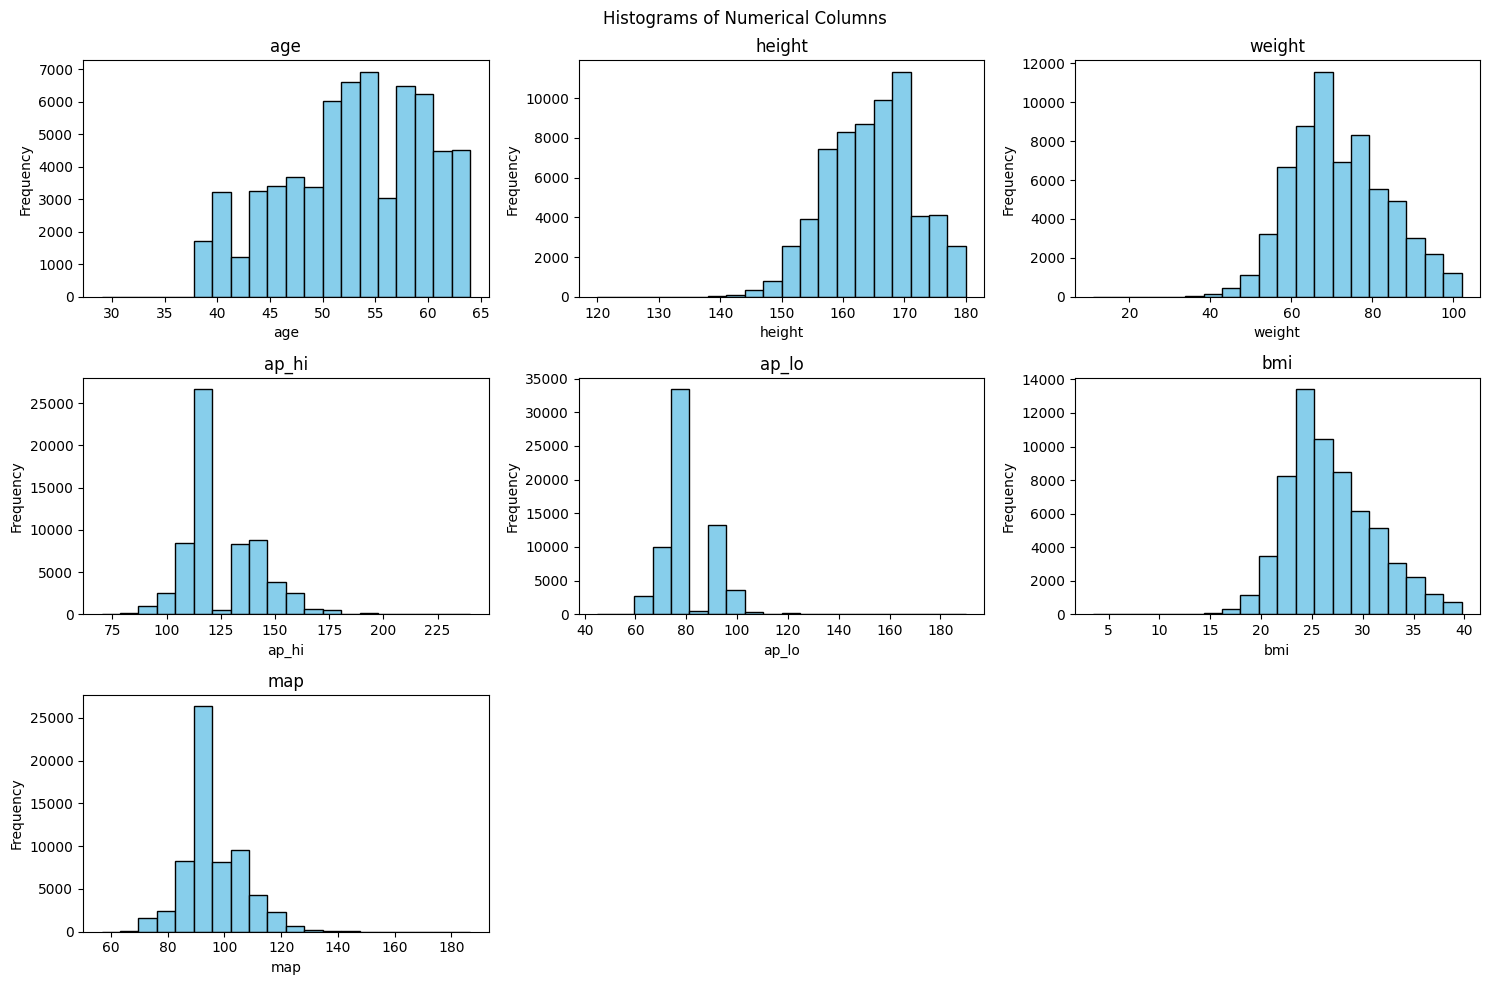

In [17]:
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'map']

# Create subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Histograms of Numerical Columns')

axes = axes.ravel()

for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

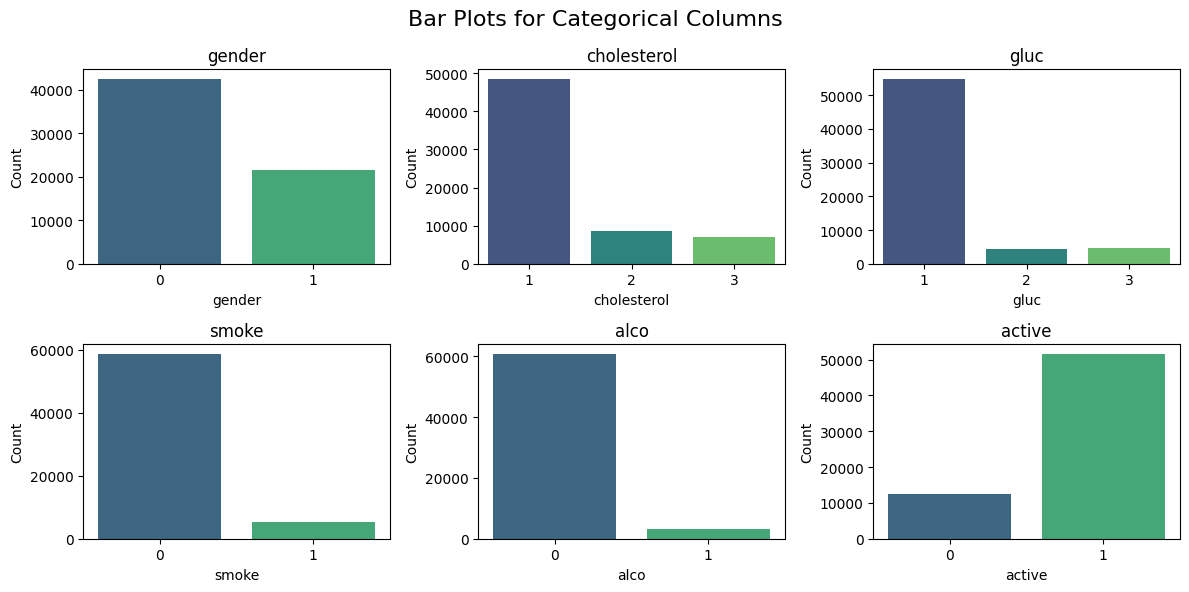

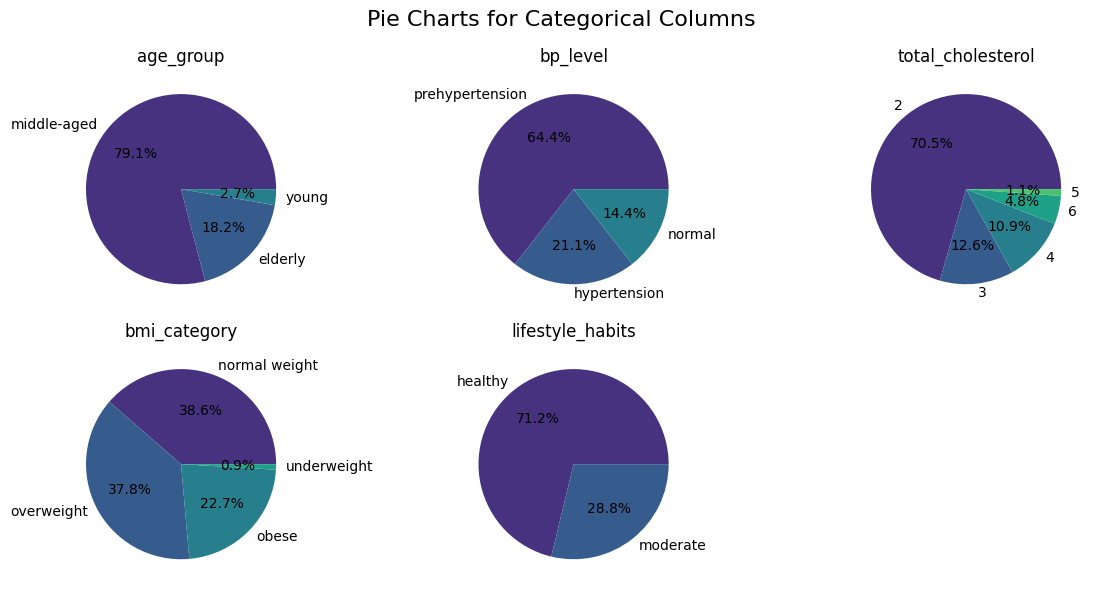

In [18]:
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',]

# Create bar plots for categorical columns
plt.figure(figsize=(12, 6))
plt.suptitle('Bar Plots for Categorical Columns', fontsize=16)

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


categorical_columns = ['age_group', 'bp_level', 'total_cholesterol', 'bmi_category', 'lifestyle_habits']

# Create pie charts for categorical columns
plt.figure(figsize=(12, 6))
plt.suptitle('Pie Charts for Categorical Columns', fontsize=16)

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = df[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    plt.title(column)

plt.tight_layout()
plt.show()


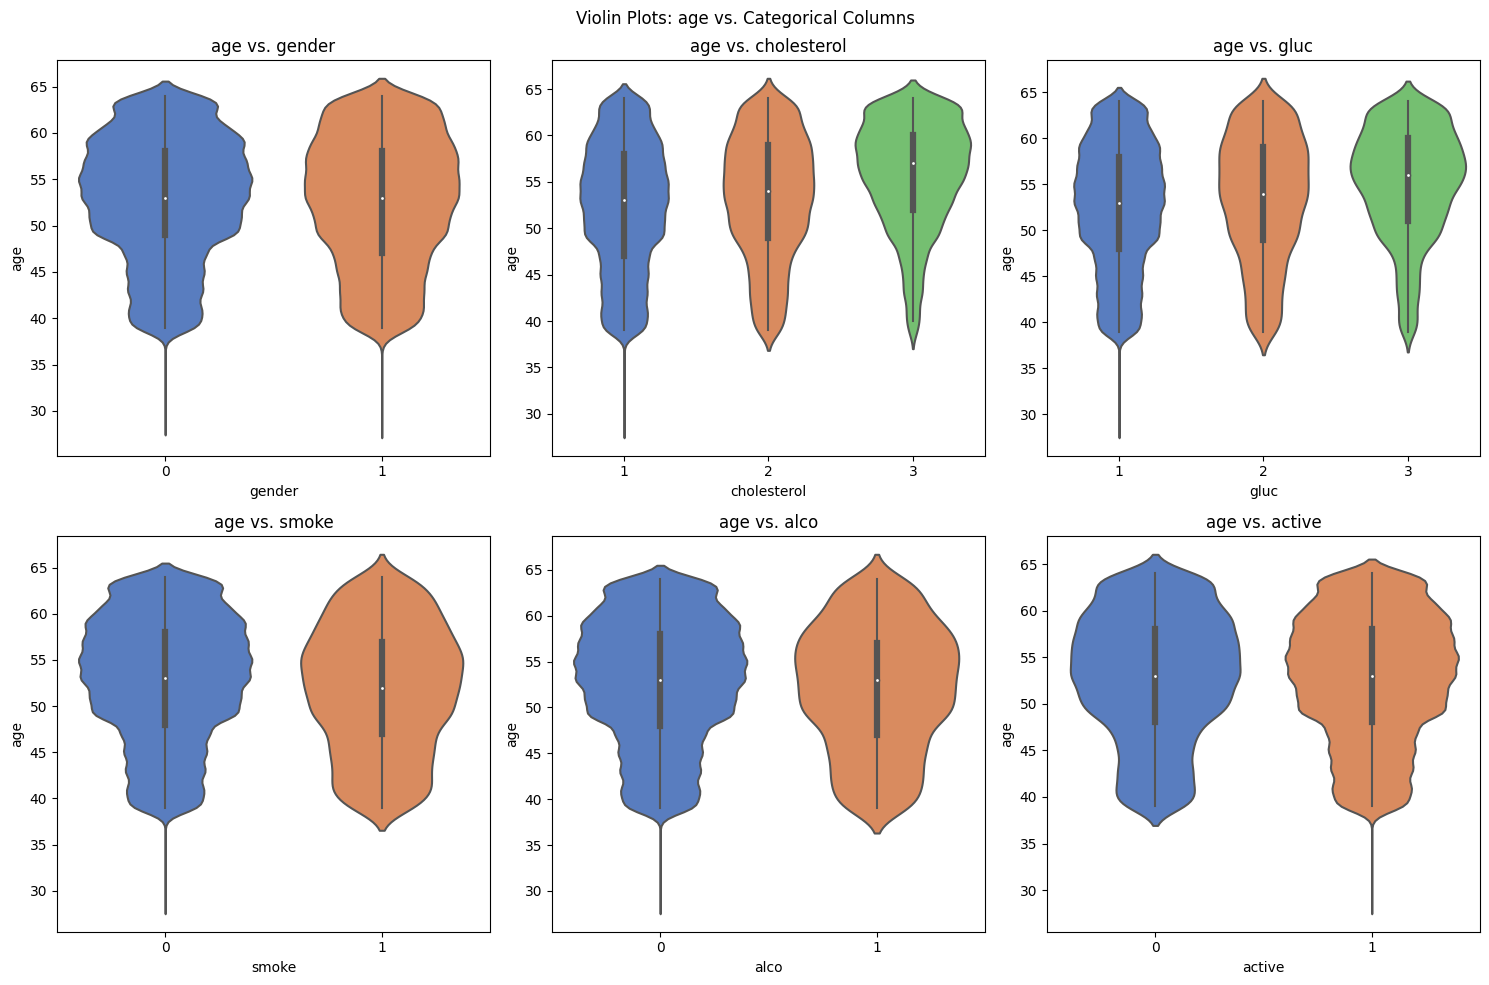

In [19]:
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
numerical_column = 'age'  

# Create subplots for violin plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Violin Plots: {numerical_column} vs. Categorical Columns')

axes = axes.ravel()


for i, column in enumerate(categorical_columns):
    sns.violinplot(x=column, y=numerical_column, data=df, ax=axes[i], palette='muted')
    axes[i].set_title(f'{numerical_column} vs. {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(numerical_column)

plt.tight_layout()
plt.show()

<Axes: xlabel='cardio', ylabel='count'>

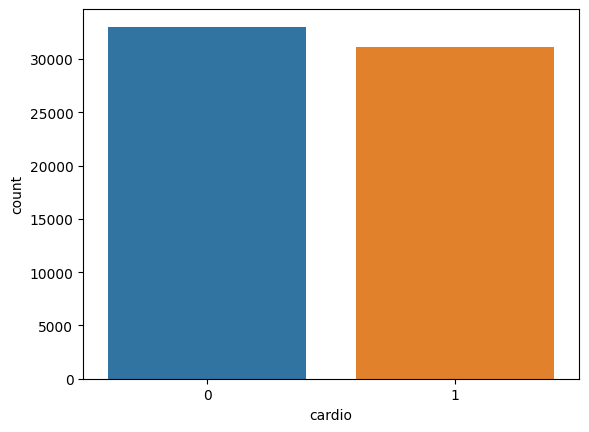

In [20]:
sns.countplot(x=df["cardio"])

# data is balanced

In [21]:
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map,bsa,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.9671,90.0000,1.70098,middle-aged,prehypertension,2,normal weight,healthy
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9277,106.6670,1.91920,middle-aged,hypertension,4,obese,healthy
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.5078,90.0000,1.71270,middle-aged,prehypertension,4,normal weight,moderate
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7105,116.6670,1.96200,middle-aged,hypertension,2,overweight,healthy
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.0112,73.3333,1.55778,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,1,1,0,0,1,1,23.6614,103.3330,1.82878,middle-aged,prehypertension,2,normal weight,healthy
69994,57,0,165,80.0,150,80,1,1,0,0,1,1,29.3848,103.3330,1.91485,middle-aged,prehypertension,2,overweight,healthy
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.9274,93.3333,1.88326,middle-aged,prehypertension,2,overweight,moderate
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.0993,98.3333,1.80555,elderly,prehypertension,3,overweight,moderate


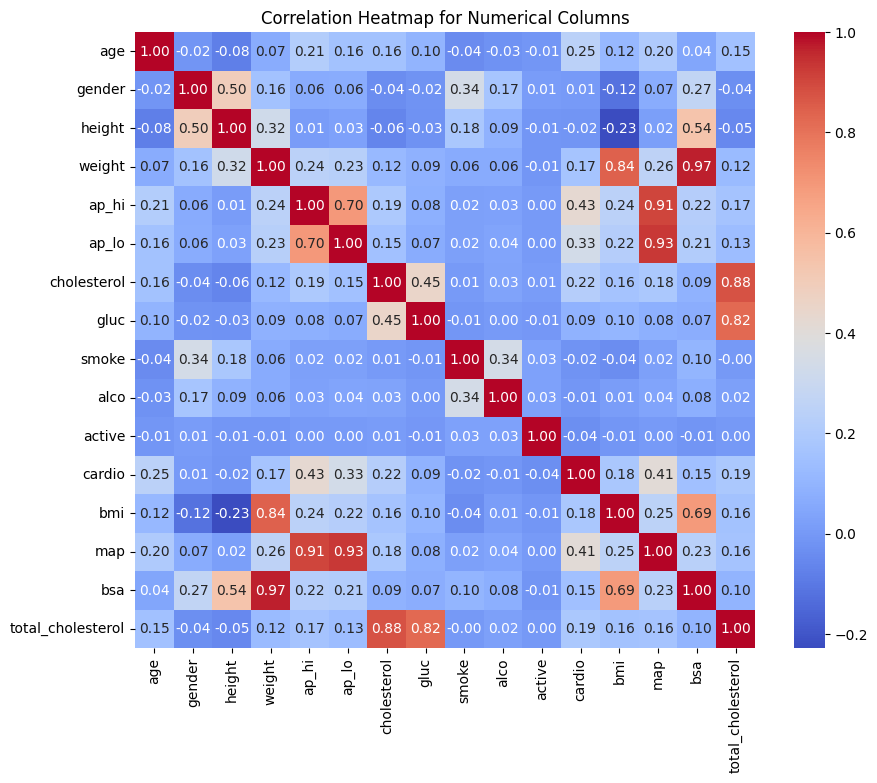

In [22]:
numerical_columns = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [23]:
del df["map"]
del df["bsa"]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.9671,middle-aged,prehypertension,2,normal weight,healthy
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9277,middle-aged,hypertension,4,obese,healthy
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.5078,middle-aged,prehypertension,4,normal weight,moderate
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7105,middle-aged,hypertension,2,overweight,healthy
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.0112,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,1,1,0,0,1,1,23.6614,middle-aged,prehypertension,2,normal weight,healthy
69994,57,0,165,80.0,150,80,1,1,0,0,1,1,29.3848,middle-aged,prehypertension,2,overweight,healthy
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.9274,middle-aged,prehypertension,2,overweight,moderate
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.0993,elderly,prehypertension,3,overweight,moderate


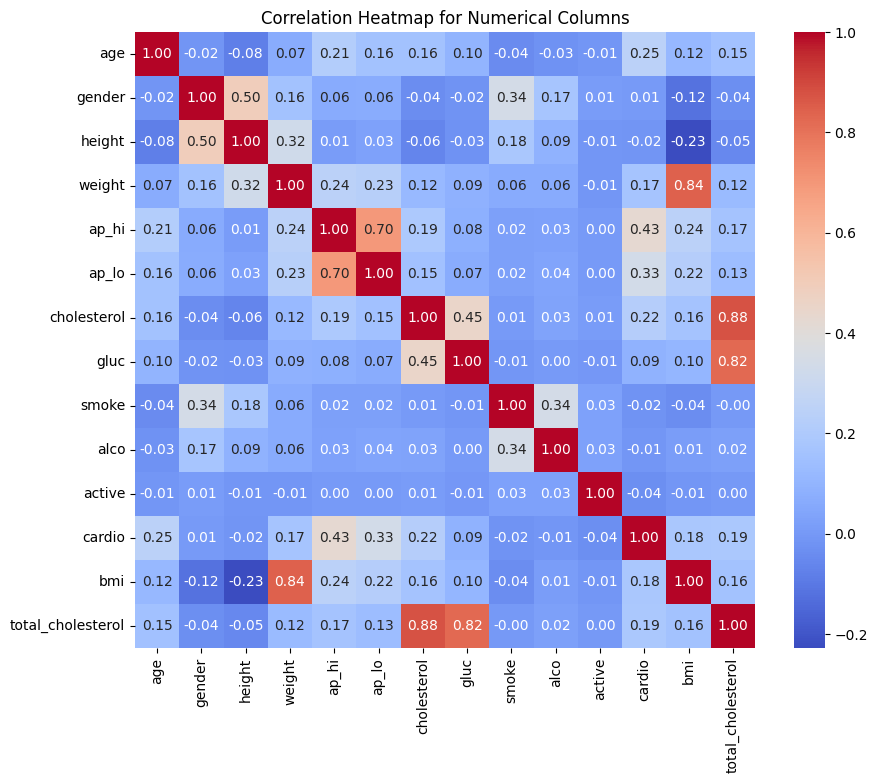

In [24]:
numerical_columns = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [25]:
numerical_columns = df.select_dtypes(include=[float, int])

correlation_matrix = numerical_columns.corr()
correlation_with_cardio = correlation_matrix['cardio']

# Sort the correlations in descending order
correlation_with_cardio = correlation_with_cardio.sort_values(ascending=False)

print(correlation_with_cardio)



cardio               1.000000
ap_hi                0.426098
ap_lo                0.334462
age                  0.245088
cholesterol          0.219767
total_cholesterol    0.188002
bmi                  0.182620
weight               0.168836
gluc                 0.090009
gender               0.005927
alco                -0.010734
height              -0.016262
smoke               -0.018902
active              -0.035907
Name: cardio, dtype: float64


<Axes: >

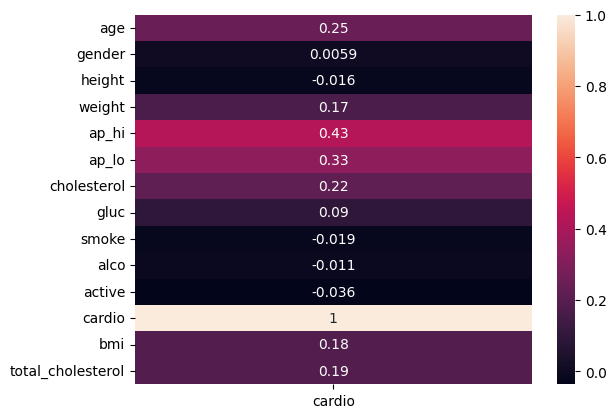

In [26]:
sns.heatmap(df.select_dtypes(include=[float, int]).corr().iloc[:,[-3]],annot=True)


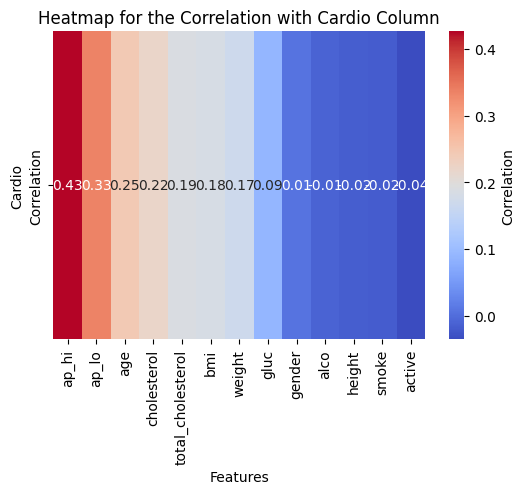

In [27]:
numerical_columns = df.select_dtypes(include=[float, int])

correlation_matrix = numerical_columns.corr()
correlation_with_cardio = correlation_matrix['cardio']

# Sort the correlations in descending order
correlation_with_cardio = correlation_with_cardio.sort_values(ascending=False)

# Exclude the first feature (column) from the correlation_with_cardio Series
correlation_with_cardio = correlation_with_cardio.iloc[1:]

# Convert the Series to a DataFrame with one row and one column
df_corr = pd.DataFrame(correlation_with_cardio.values, index=correlation_with_cardio.index, columns=['Correlation'])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.transpose(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Heatmap for the Correlation with Cardio Column')
plt.xlabel('Features')
plt.ylabel('Cardio')
plt.show()

### First, Encode columns

In [28]:
df["cholesterol"] = df["cholesterol"].map({1: "normal", 2: "above_normal", 3: "well_above_normal"})
df["gluc"] = df["gluc"].map({1: "normal", 2: "above_normal", 3: "well_above_normal"})

In [29]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50,1,168,62.0,110,80,normal,normal,0,0,1,0,21.9671,middle-aged,prehypertension,2,normal weight,healthy
1,55,0,156,85.0,140,90,well_above_normal,normal,0,0,1,1,34.9277,middle-aged,hypertension,4,obese,healthy
2,51,0,165,64.0,130,70,well_above_normal,normal,0,0,0,1,23.5078,middle-aged,prehypertension,4,normal weight,moderate
3,48,1,169,82.0,150,100,normal,normal,0,0,1,1,28.7105,middle-aged,hypertension,2,overweight,healthy
4,47,0,156,56.0,100,60,normal,normal,0,0,0,0,23.0112,middle-aged,normal,2,normal weight,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,normal,normal,0,0,1,1,23.6614,middle-aged,prehypertension,2,normal weight,healthy
69994,57,0,165,80.0,150,80,normal,normal,0,0,1,1,29.3848,middle-aged,prehypertension,2,overweight,healthy
69995,52,1,168,76.0,120,80,normal,normal,1,0,1,0,26.9274,middle-aged,prehypertension,2,overweight,moderate
69998,61,0,163,72.0,135,80,normal,above_normal,0,0,0,1,27.0993,elderly,prehypertension,3,overweight,moderate


In [30]:
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_group', 'bp_level', 'bmi_category', 'lifestyle_habits']
for col in categorical_columns:
    print(f"{col} ==>", df[col].nunique())

gender ==> 2
cholesterol ==> 3
gluc ==> 3
smoke ==> 2
alco ==> 2
active ==> 2
age_group ==> 3
bp_level ==> 3
bmi_category ==> 4
lifestyle_habits ==> 2


In [31]:
df["lifestyle_habits"] = df["lifestyle_habits"].map({"healthy": 0, "moderate": 1})
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,bp_level,total_cholesterol,bmi_category,lifestyle_habits
0,50,1,168,62.0,110,80,normal,normal,0,0,1,0,21.9671,middle-aged,prehypertension,2,normal weight,0
1,55,0,156,85.0,140,90,well_above_normal,normal,0,0,1,1,34.9277,middle-aged,hypertension,4,obese,0
2,51,0,165,64.0,130,70,well_above_normal,normal,0,0,0,1,23.5078,middle-aged,prehypertension,4,normal weight,1
3,48,1,169,82.0,150,100,normal,normal,0,0,1,1,28.7105,middle-aged,hypertension,2,overweight,0
4,47,0,156,56.0,100,60,normal,normal,0,0,0,0,23.0112,middle-aged,normal,2,normal weight,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,normal,normal,0,0,1,1,23.6614,middle-aged,prehypertension,2,normal weight,0
69994,57,0,165,80.0,150,80,normal,normal,0,0,1,1,29.3848,middle-aged,prehypertension,2,overweight,0
69995,52,1,168,76.0,120,80,normal,normal,1,0,1,0,26.9274,middle-aged,prehypertension,2,overweight,1
69998,61,0,163,72.0,135,80,normal,above_normal,0,0,0,1,27.0993,elderly,prehypertension,3,overweight,1


In [32]:
categorical_columns = ['cholesterol', 'gluc', 'age_group', 'bp_level', 'bmi_category']
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

# Display the encoded DataFrame
df_encoded


,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,...,age_group_elderly,age_group_middle-aged,age_group_young,bp_level_hypertension,bp_level_normal,bp_level_prehypertension,bmi_category_normal weight,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
0,50,1,168,62.0,110,80,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,55,0,156,85.0,140,90,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
2,51,0,165,64.0,130,70,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
3,48,1,169,82.0,150,100,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,47,0,156,56.0,100,60,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
69994,57,0,165,80.0,150,80,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
69995,52,1,168,76.0,120,80,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
69998,61,0,163,72.0,135,80,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [33]:
df = df_encoded

### Modelling 

In [34]:
y = df["cardio"]
del df["cardio"]

X = df

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [36]:
X_train.shape

(44936, 28)

In [37]:
y_train.shape

(44936,)

In [38]:
X_test.shape

(19259, 28)

In [39]:
y_test.shape

(19259,)

In [40]:
## Import models
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [41]:
pipelines = {
    'CatB':make_pipeline(StandardScaler(), CatBoostClassifier(eval_metric='Accuracy',verbose=1000)),
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'gnb':make_pipeline(StandardScaler(), GaussianNB()),
    'dtc':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'xg':make_pipeline(StandardScaler(), XGBClassifier()),
}

In [42]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

Learning rate set to 0.052311
0:	learn: 0.7205359	total: 63ms	remaining: 1m 2s
999:	learn: 0.7598362	total: 5.51s	remaining: 0us


In [43]:
# Make list for Scores
al=[]
ac=[]
pre=[]
rec=[]
f1 = []
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    al.append(algo)
    ac.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    rec.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    y_true = y_test

# Calculate TP, TN, FP, FN

    


    print(algo,'Accuracy -', accuracy_score(y_test, y_pred))
    print(algo,'Recall Score - ',recall_score(y_test,y_pred))
    print(algo,'Precision - ',precision_score(y_test,y_pred))
    print(algo,'F1 Score - ',precision_score(y_test,y_pred))

CatB Accuracy - 0.73373487720027
CatB Recall Score -  0.6815600557162755
CatB Precision -  0.7468592227310086
CatB F1 Score -  0.7468592227310086
lr Accuracy - 0.7290617373695415
lr Recall Score -  0.6351655416264866
lr Precision -  0.7657925332644361
lr F1 Score -  0.7657925332644361
rc Accuracy - 0.7268290150059712
rc Recall Score -  0.6154505518054216
rc Precision -  0.7745415318230853
rc F1 Score -  0.7745415318230853
rf Accuracy - 0.7066306661820447
rf Recall Score -  0.6862745098039216
rf Precision -  0.7017639969321793
rf F1 Score -  0.7017639969321793
gb Accuracy - 0.7343579625110338
gb Recall Score -  0.6784528018857816
gb Precision -  0.7496152480170475
gb F1 Score -  0.7496152480170475
gnb Accuracy - 0.7072537514928086
gnb Recall Score -  0.648880317154184
gnb Precision -  0.7194962575739575
gnb F1 Score -  0.7194962575739575
dtc Accuracy - 0.6373124253595721
dtc Recall Score -  0.6195221257902068
dtc Precision -  0.6273871527777778
dtc F1 Score -  0.6273871527777778
xg Accu

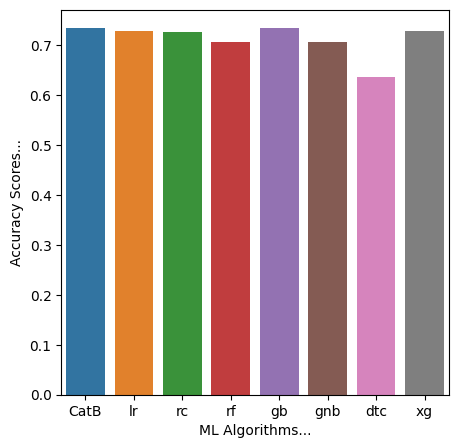

In [44]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Accuracy Scores...')
ax=sns.barplot(x=al,y=ac)
plt.show()

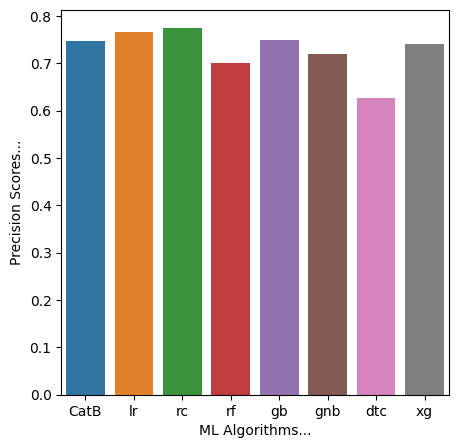

In [45]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Precision Scores...')
ax=sns.barplot(x=al,y=pre)
plt.show()

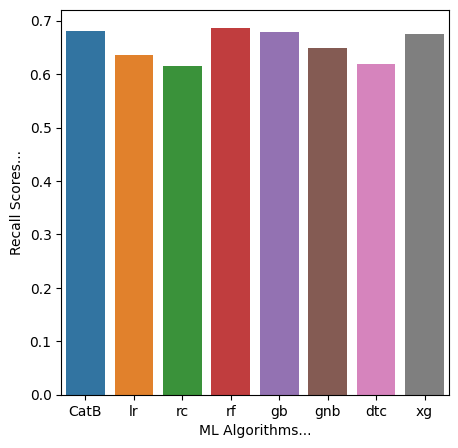

In [46]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Recall Scores...')
ax=sns.barplot(x=al,y=rec)
plt.show()

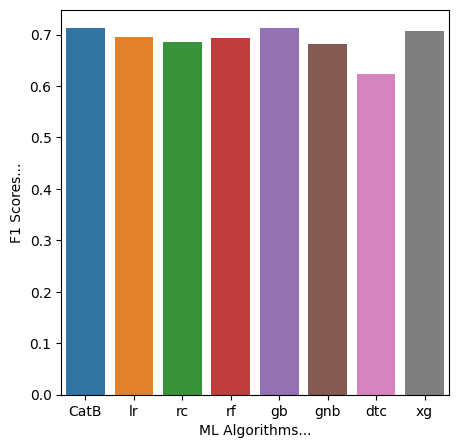

In [47]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('F1 Scores...')
ax=sns.barplot(x=al,y=f1)
plt.show()

In [48]:
from sklearn.ensemble import StackingClassifier

In [49]:
CatB = CatBoostClassifier(verbose=1000,eval_metric='f1')
rc = RidgeClassifier()
gb = GradientBoostingClassifier()
xg = XGBClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()

stregr = StackingClassifier(estimators=[('xg', xg),('rc',rc),('gb',gb)],final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_s = f1_score(y_test,y_pred)

# Evaluate the model
print('Accuracy -', accuracy)
print('Recall Score - ',recall)
print('Precision - ',precision)
print('f1 Score - ',f1_s)

al.append('stacked regressor')
ac.append(ac)
pre.append(precision)
rec.append(recall)
f1.append(f1_s)

Accuracy - 0.7347214289423127
Recall Score -  0.682631522554377
Precision -  0.747945527119042
f1 Score -  0.7137975463559464


In [50]:
rc = RidgeClassifier()
rc = rc.fit(X_train, y_train)

final_pred = rc.predict(X_test)

train_pred = rc.predict(X_train)

print("test",f1_score(y_test, final_pred))
print("train",f1_score(y_train, train_pred))

test 0.6858132314306186
train 0.6853064865553715
